In [34]:
#Implement convolution operation for a sample image of shape (H=6, W=6, C=1) with a random kernel of size (3,3) using torch.nn.functional.conv2d
import torch
import torch.nn.functional as functional

image = torch.rand(1, 1, 6, 6)
print("The shape of the image is " + str(image.size()))
print("The randomized image matrix is")
print(image)
kernel = torch.rand(1, 1, 3, 3)
print("The image will be convolved with the kernel:")
print(kernel)
print("The shape of the kernel is " + str(kernel.size()))
out_image = functional.conv2d(image, kernel, padding = 0)
print("The convolved output image is:")
print(out_image) 
print("The shape of the output image is " + str(out_image.size()))

The shape of the image is torch.Size([1, 1, 6, 6])
The randomized image matrix is
tensor([[[[0.2075, 0.4384, 0.4509, 0.9157, 0.9157, 0.8891],
          [0.4148, 0.7016, 0.5064, 0.8856, 0.1990, 0.7958],
          [0.7914, 0.7832, 0.6472, 0.8797, 0.3342, 0.6023],
          [0.9563, 0.4461, 0.3975, 0.3825, 0.6003, 0.3360],
          [0.7075, 0.9914, 0.2893, 0.2633, 0.9254, 0.1521],
          [0.7886, 0.3844, 0.1108, 0.5798, 0.8465, 0.2806]]]])
The image will be convolved with the kernel:
tensor([[[[0.9618, 0.8507, 0.0786],
          [0.3020, 0.7099, 0.5056],
          [0.4780, 0.4283, 0.7615]]]])
The shape of the kernel is torch.Size([1, 1, 3, 3])
The convolved output image is:
tensor([[[[2.6940, 3.2179, 3.1076, 3.5629],
          [3.1088, 2.9908, 3.0560, 2.5869],
          [3.2679, 2.7816, 3.0479, 2.5273],
          [3.0203, 2.1079, 2.4429, 2.5717]]]])
The shape of the output image is torch.Size([1, 1, 4, 4])


In [35]:
"""What is the dimension of the output image? Apply, various values for parameter stride=1and note the change in the dimension of the output image. Arrive at an equation for the
output image size with respect to the kernel size and stride and verify your answer with code. Now, repeat the exercise by changing padding parameter. Obtain a formula using
kernel, stride, and padding to get the output image size. What is the total number of parameters in your network? Verify with code. (done in notebook)"""

'What is the dimension of the output image? Apply, various values for parameter stride=1and note the change in the dimension of the output image. Arrive at an equation for the\noutput image size with respect to the kernel size and stride and verify your answer with code. Now, repeat the exercise by changing padding parameter. Obtain a formula using\nkernel, stride, and padding to get the output image size. What is the total number of parameters in your network? Verify with code. (done in notebook)'

In [40]:
#Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3 and observe theoutput. Implement the equivalent of torch.nn.Conv2d using the torch.nn.functional.conv2D to get the same output. You may ignore bias.
import torch
import torch. nn as nn

image = torch.rand(1, 1, 6, 6)
process = nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 3, stride = (1, 1), padding = (0, 0))
out_image = process(image)
print(out_image)
print("The shape of the output image is" + str(out_image.size()))


tensor([[[[ 0.4122,  0.3650,  0.2517,  0.3444],
          [ 0.2111,  0.1907,  0.2203,  0.2979],
          [ 0.0719,  0.0828,  0.4420,  0.2929],
          [-0.0136,  0.3570,  0.4861,  0.4773]],

         [[-0.3496,  0.0245, -0.5182, -0.1284],
          [-0.2780, -0.2203, -0.2102, -0.0851],
          [-0.4607, -0.2571, -0.0983, -0.3700],
          [-0.4344, -0.0924,  0.0577, -0.3000]],

         [[ 0.1284, -0.4204, -0.2779, -0.1705],
          [-0.3815, -0.1992, -0.2258, -0.2870],
          [-0.0178, -0.1243, -0.0339, -0.3041],
          [-0.0119,  0.0615, -0.2862, -0.2965]]]],
       grad_fn=<ConvolutionBackward0>)
The shape of the output image istorch.Size([1, 3, 4, 4])


In [118]:
"""Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the
classification accuracy in the form of a Confusion matrix. Verify the number of learnable
parameters in the model.
Training a CNN on an image dataset is similar to training a basic multi-layer feed-forward
network on numerical data as outlined below.
Define model architecture
Load dataset from disk
Loop over epochs and batches
Make predictions and compute loss
Properly zero our gradient, perform backpropagation, and update model parameters"""
import torch.nn as nn
from keras.datasets import mnist
from torch import optim
from torch.utils.data import Dataset, DataLoader


class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1, 64, kernel_size = 4), 
        nn.ReLU(), 
        nn.MaxPool2d((2, 2), stride = 2), 
        nn.Conv2d(64, 128, kernel_size = 3), 
        nn.ReLU(), 
        nn.MaxPool2d((2, 2), stride = 2), 
        nn.Conv2d(128, 64, kernel_size = 3), 
        nn.ReLU(), 
        nn.MaxPool2d((2, 2), stride = 2))
        self.classification_head = nn.Sequential(nn.Linear(64, 20, bias = True),
        nn.ReLU(), 
        nn.Linear(20, 10, bias = True))

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size, -1))
        
class customdataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x, dtype=torch.float32)
    self.y = torch.tensor(y, dtype=torch.float32)
    self.y = self.y.type(torch.LongTensor)

  def size(self):
    return len(self.x)

  def get_item(self, index):
    return [self.x[index], self.y[index]]

(train_x, train_y), (test_x, test_y) = mnist.load_data()
data = customdataset(train_x, train_y)
batch_size = 100
train_data_loader = DataLoader(list(zip(data.x, data.y)), batch_size, shuffle = True)
m1 = CNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(m1.parameters(), lr=0.01)
losses = []


for epoch in range(2):
    m1.train(True)
    loss_t = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        inputs = torch.unsqueeze(inputs, 1)
        optimizer.zero_grad()
        outputs = m1.forward(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_t += loss.item()
        if i%50 == 0:
            print("Data entry:", i)
    loss_t = loss_t/(len(train_data_loader)*batch_size)
    losses.append(loss_t)
    """if epoch%10 == 0:
        print("Epoch number " + str(epoch) + " Loss is " + str(loss_t))"""


Data entry: 0
Data entry: 50
Data entry: 100
Data entry: 150
Data entry: 200
Data entry: 250
Data entry: 300
Data entry: 350
Data entry: 400
Data entry: 450
Data entry: 500
Data entry: 550
Data entry: 0
Data entry: 50
Data entry: 100
Data entry: 150
Data entry: 200
Data entry: 250
Data entry: 300
Data entry: 350
Data entry: 400
Data entry: 450
Data entry: 500
Data entry: 550


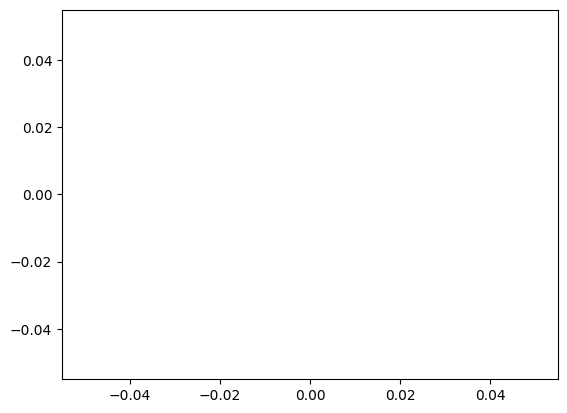

In [101]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(0, len(losses))], losses)

In [120]:
torch.save(m1,"m_modified.pt")

In [ ]:
#Modify CNN of Qn. 3 to reduce the number of parameters in the network. Draw a plot of percentage drop in parameters vs accuracy.